# EDA And Feature Engineering Flight Price Prediction

<div class="alert alert-block alert-success" style="color:darkgreen; padding: 20px; margin: 20px 0;">
    <h2 style="font-size: 20px; font-weight: bold; color: darkgreen;">Features</h2>
    <p style="font-size: 16px; line-height: 1.6;">
        1. <strong>Airline</strong>: The name of the airline company is stored in the <strong>airline</strong> column. It is a categorical feature having 6 different airlines.<br>
        2. <strong>Flight</strong>: <strong>Flight</strong> stores information regarding the plane's flight code. It is a categorical feature.<br>
        3. <strong>Source City</strong>: City from which the flight takes off. It is a categorical feature having 6 unique cities.<br>
        4. <strong>Departure Time</strong>: This is a derived categorical feature created by grouping time periods into bins. It stores information about the <strong>departure time</strong> and has 6 unique time labels.<br>
        5. <strong>Stops</strong>: A categorical feature with 3 distinct values that stores the number of stops between the <strong>source</strong> and <strong>destination</strong> cities.<br>
        6. <strong>Arrival Time</strong>: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and stores information about the <strong>arrival time</strong>.<br>
        7. <strong>Destination City</strong>: City where the flight will land. It is a categorical feature having 6 unique cities.<br>
        8. <strong>Class</strong>: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.<br>
        9. <strong>Duration</strong>: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.<br>
        10. <strong>Days Left</strong>: This is a derived characteristic that is calculated by subtracting the trip date from the booking date.<br>
        11. <strong>Price</strong>: The target variable that stores information about the ticket price.
    </p>
</div>


In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\archive (3)\Data_Train.csv")
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
# Summary statistics for numerical columns

df.describe(include=['object'])


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
# Find the mode of the Total_Stops column
mode_total_stops = df['Total_Stops'].mode()[0]

# Fill missing values with the mode
df['Total_Stops'].fillna(mode_total_stops, inplace=True)

In [9]:
# Find the mode of the Total_Stops column
mode_total_stops = df['Route'].mode()[0]

# Fill missing values with the mode
df['Route'].fillna(mode_total_stops, inplace=True)

In [10]:
df.duplicated().sum()

220

In [11]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)


In [12]:
# Distribution of airlines
print(df['Airline'].value_counts())

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1695
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64


In [13]:
# Distribution of sources and destinations
print(df['Source'].value_counts())

Source
Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64


In [14]:
print(df['Destination'].value_counts())

Destination
Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64


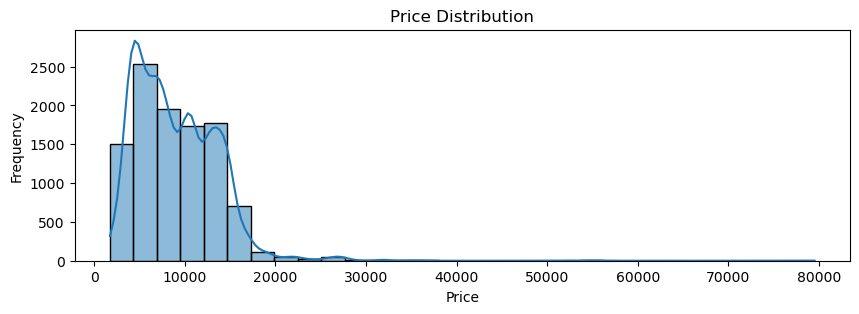

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of prices
plt.figure(figsize=(10, 3))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Route
DEL ? BOM ? COK    2377
BLR ? DEL          1536
CCU ? BOM ? BLR     979
CCU ? BLR           724
BOM ? HYD           621
CCU ? DEL ? BLR     565
BLR ? BOM ? DEL     402
MAA ? CCU           381
DEL ? HYD ? COK     326
DEL ? BLR ? COK     232
Name: count, dtype: int64


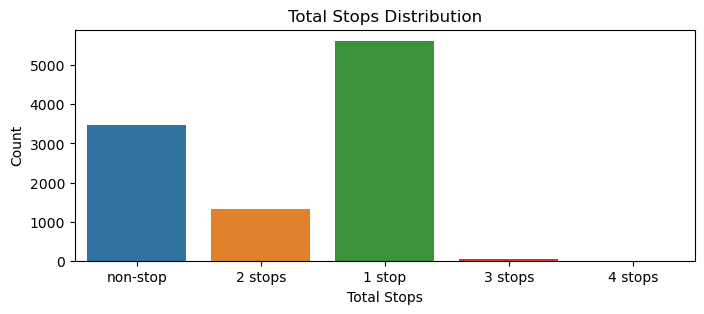

In [16]:
# Distribution of routes
print(df['Route'].value_counts().head(10))  # Top 10 most common routes

# Total stops distribution
plt.figure(figsize=(8, 3))
sns.countplot(x='Total_Stops', data=df)
plt.title('Total Stops Distribution')
plt.xlabel('Total Stops')
plt.ylabel('Count')
plt.show()


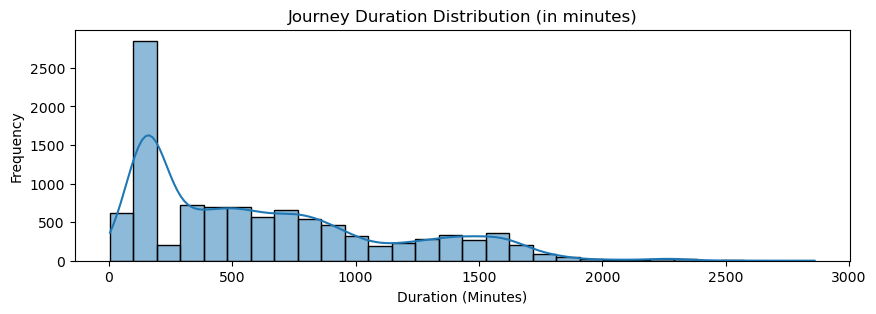

In [17]:
# Convert duration to a numerical format (e.g., minutes)
def duration_to_minutes(duration):
    parts = duration.split()
    hours = minutes = 0
    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            minutes = int(part.replace('m', ''))
    return hours * 60 + minutes

df['Duration_Minutes'] = df['Duration'].apply(duration_to_minutes)

plt.figure(figsize=(10, 3))
sns.histplot(df['Duration_Minutes'], bins=30, kde=True)
plt.title('Journey Duration Distribution (in minutes)')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency')
plt.show()


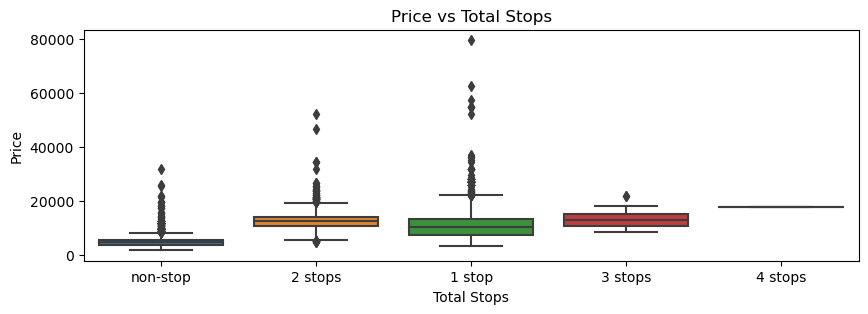

In [18]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='Total_Stops', y='Price', data=df)
plt.title('Price vs Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()


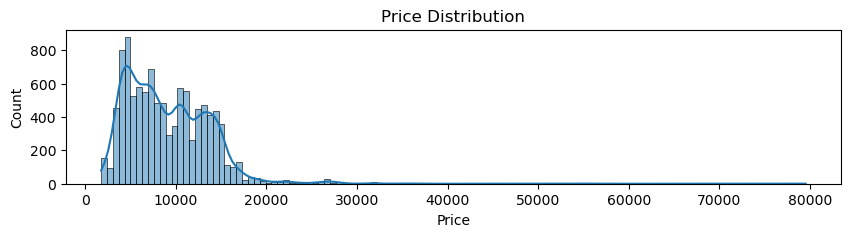

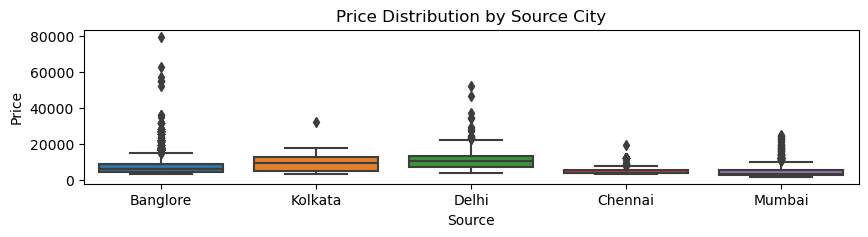

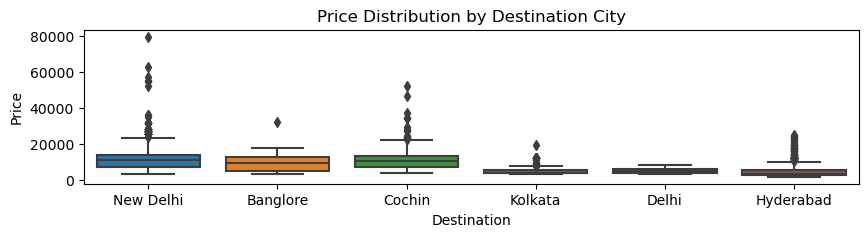

In [19]:
# Distribution of Price
plt.figure(figsize=(10,2))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.show()

# Boxplot of Price vs Source/Destination
plt.figure(figsize=(10,2))
sns.boxplot(x='Source', y='Price', data=df)
plt.title('Price Distribution by Source City')
plt.show()

plt.figure(figsize=(10,2))
sns.boxplot(x='Destination', y='Price', data=df)
plt.title('Price Distribution by Destination City')
plt.show()


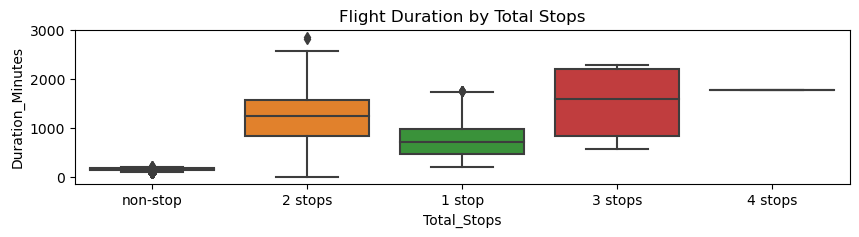

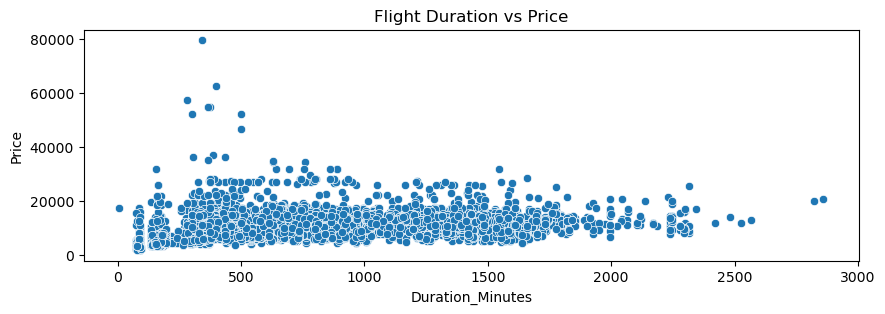

In [20]:
# Boxplot of Duration by Total Stops
plt.figure(figsize=(10,2))
sns.boxplot(x='Total_Stops', y='Duration_Minutes', data=df)
plt.title('Flight Duration by Total Stops')
plt.show()

# Correlation between Duration and Price
plt.figure(figsize=(10,3))
sns.scatterplot(x='Duration_Minutes', y='Price', data=df)
plt.title('Flight Duration vs Price')
plt.show()


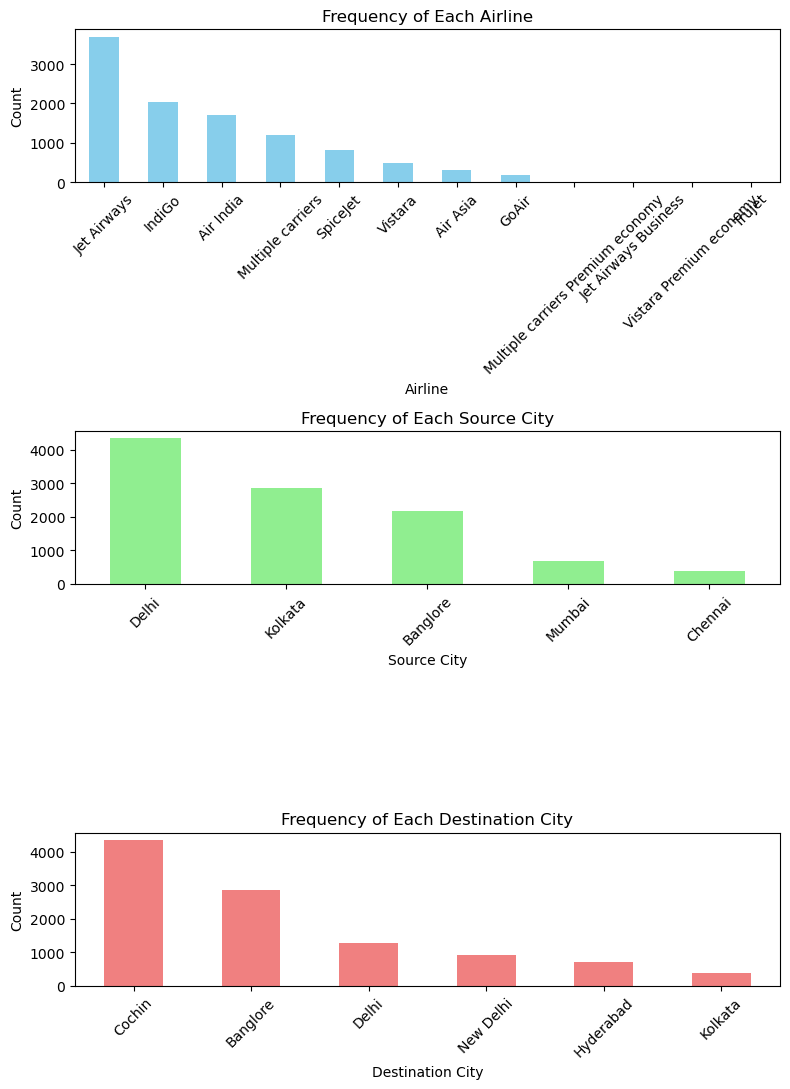

In [21]:
fig, axs = plt.subplots(3, 1, figsize=(8, 11))  # Adjusted figsize for vertical plots

# Plot frequency of each airline
df['Airline'].value_counts().plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_xlabel('Airline')
axs[0].set_ylabel('Count')
axs[0].set_title('Frequency of Each Airline')
axs[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Plot frequency of each source city
df['Source'].value_counts().plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_xlabel('Source City')
axs[1].set_ylabel('Count')
axs[1].set_title('Frequency of Each Source City')
axs[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Plot frequency of each destination city
df['Destination'].value_counts().plot(kind='bar', ax=axs[2], color='lightcoral')
axs[2].set_xlabel('Destination City')
axs[2].set_ylabel('Count')
axs[2].set_title('Frequency of Each Destination City')
axs[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels by 45 degrees

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


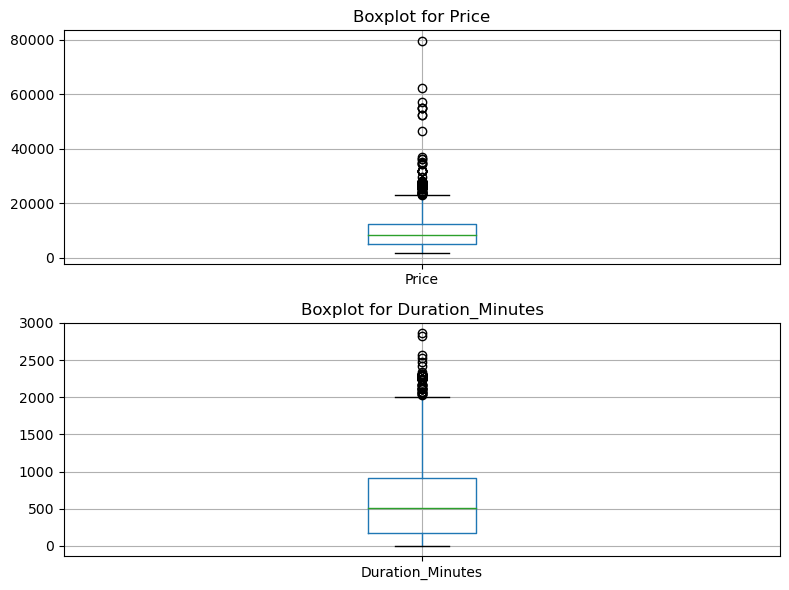

In [22]:

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create subplots to visualize outliers in all numerical columns
plt.figure(figsize=(8, 6))  # Adjust the figure size

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)  # Create a subplot for each column
    df.boxplot(column=col)  # Create a box plot
    plt.title(f'Boxplot for {col}')  # Add title for each plot
    plt.tight_layout()  # Ensure there's no overlap between subplots

# Show all plots
plt.show()


In [23]:
import pandas as pd

# Identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define a function to remove outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # First quartile (25%)
    Q3 = df[col].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile Range (IQR)
    
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    
    # Filter the data to remove outliers
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_cleaned

# Apply the function to each numerical column
for col in numerical_columns:
    df = remove_outliers(df, col)

# Display the cleaned DataFrame
print(f"Data after removing outliers:\n {df.info()}")


<class 'pandas.core.frame.DataFrame'>
Index: 10295 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10295 non-null  object
 1   Date_of_Journey   10295 non-null  object
 2   Source            10295 non-null  object
 3   Destination       10295 non-null  object
 4   Route             10295 non-null  object
 5   Dep_Time          10295 non-null  object
 6   Arrival_Time      10295 non-null  object
 7   Duration          10295 non-null  object
 8   Total_Stops       10295 non-null  object
 9   Additional_Info   10295 non-null  object
 10  Price             10295 non-null  int64 
 11  Duration_Minutes  10295 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.0+ MB
Data after removing outliers:
 None


In [24]:
df['Date'] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month'] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Year'] = df['Date_of_Journey'].str.split('/').str[2].astype(int)


In [25]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Minutes,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,150,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,155,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,180,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,160,1,3,2019


In [26]:
df.drop('Date_of_Journey', axis=1,inplace=True)


In [27]:
# Splitting 'Arrival_Time' into 'Arrival_hours' and 'Arrival_min'
df['Arrival_hours'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_min'] = df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

In [28]:
# Dropping the 'Arrival_Time' column
df.drop('Arrival_Time', axis=1, inplace=True)

In [29]:
# Splitting 'Dep_Time' into 'Dept_hour' and 'Dept_min'
df['Dept_hour'] = df['Dep_Time'].str.split(':').str[0]
df['Dept_min'] = df['Dep_Time'].str.split(':').str[1]

# Convert 'Dept_hour' and 'Dept_min' to integers
df['Dept_hour'] = df['Dept_hour'].astype(int)
df['Dept_min'] = df['Dept_min'].astype(int)


In [30]:

# Dropping the 'Dep_Time' column
df.drop('Dep_Time', axis=1, inplace=True)


In [31]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Duration            0
Total_Stops         0
Additional_Info     0
Price               0
Duration_Minutes    0
Date                0
Month               0
Year                0
Arrival_hours       0
Arrival_min         0
Dept_hour           0
Dept_min            0
dtype: int64

In [32]:
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Duration_Minutes,Date,Month,Year,Arrival_hours,Arrival_min,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,170,24,3,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,445,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,1140,9,6,2019,04,25,9,25


In [33]:
# Ensure that 'Duration' is a string to handle non-string entries
df['Duration'] = df['Duration'].astype(str)

# Extract hours, defaulting to '0' if not present
df['Duration_hours'] = df['Duration'].str.extract(r'(\d+)h')[0].fillna('0').astype(int)

# Extract minutes, defaulting to '0' if not present
df['Duration_minutes'] = df['Duration'].str.extract(r'(\d+)m')[0].fillna('0').astype(int)



In [34]:
# Optional: Drop the original 'Duration' column if no longer needed
df.drop('Duration', axis=1, inplace=True)


In [35]:
df.duplicated().sum()

2

In [36]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [37]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [38]:


# Map the 'Total_Stops' values to integers
df['Total_Stops'] = df['Total_Stops'].map({
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}).fillna(1).astype(int)



In [39]:
# Display the updated 'Total_Stops' column
df['Total_Stops'].isnull().sum()


0

In [40]:
df['Total_Stops'].unique()

array([0, 2, 1, 3, 4])

In [41]:
df.duplicated().sum()

2

In [42]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Price               0
Duration_Minutes    0
Date                0
Month               0
Year                0
Arrival_hours       0
Arrival_min         0
Dept_hour           0
Dept_min            0
Duration_hours      0
Duration_minutes    0
dtype: int64

In [43]:

# Dropping the 'Dep_Time' column
df.drop('Route', axis=1, inplace=True)


In [44]:
from sklearn.preprocessing import OneHotEncoder

In [45]:

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity

# Fit and transform the data
encoded_array = encoder.fit_transform(df[['Airline', 'Source', 'Destination']])

encoded_array

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [46]:
# Convert the result to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out())

# Display the encoded DataFrame
encoded_df.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Duration_Minutes,Date,Month,Year,Arrival_hours,Arrival_min,Dept_hour,Dept_min,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,170,24,3,2019,01,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,445,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,1140,9,6,2019,04,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,325,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,285,1,3,2019,21,35,16,50,4,45


In [48]:
# Concatenate the encoded features with the original DataFrame (excluding the original categorical columns)
df = pd.concat([df.drop(['Airline', 'Source', 'Destination'], axis=1), encoded_df], axis=1)

# Display the updated DataFrame
df.head()

,Total_Stops,Additional_Info,Price,Duration_Minutes,Date,Month,Year,Arrival_hours,Arrival_min,Dept_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,No info,3897.0,170.0,24.0,3.0,2019.0,01,10,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,No info,7662.0,445.0,1.0,5.0,2019.0,13,15,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,No info,13882.0,1140.0,9.0,6.0,2019.0,04,25,9.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,No info,6218.0,325.0,12.0,5.0,2019.0,23,30,18.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,No info,13302.0,285.0,1.0,3.0,2019.0,21,35,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', 'No Info', '1 Long layover',
       'Change airports', 'Red-eye flight', nan], dtype=object)

In [50]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Additional_Info' column
df['Additional_Info'] = label_encoder.fit_transform(df['Additional_Info'])

# Display the updated DataFrame
df.head()


,Total_Stops,Additional_Info,Price,Duration_Minutes,Date,Month,Year,Arrival_hours,Arrival_min,Dept_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,5,3897.0,170.0,24.0,3.0,2019.0,01,10,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.0,5,7662.0,445.0,1.0,5.0,2019.0,13,15,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,5,13882.0,1140.0,9.0,6.0,2019.0,04,25,9.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,5,6218.0,325.0,12.0,5.0,2019.0,23,30,18.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,5,13302.0,285.0,1.0,3.0,2019.0,21,35,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
df['Additional_Info'].unique()

array([5, 2, 4, 3, 0, 1, 6, 7])

In [52]:
df.shape

(10658, 32)

In [53]:
df.columns

Index(['Total_Stops', 'Additional_Info', 'Price', 'Duration_Minutes', 'Date',
       'Month', 'Year', 'Arrival_hours', 'Arrival_min', 'Dept_hour',
       'Dept_min', 'Duration_hours', 'Duration_minutes', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_scale = ['Total_Stops', 'Additional_Info', 'Price', 'Duration_Minutes',
                    'Date', 'Month', 'Year', 'Arrival_hours', 'Arrival_min',
                    'Dept_hour', 'Dept_min', 'Duration_hours', 'Duration_minutes',
                    'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
                    'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy',
                    'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara',
                    'Airline_Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
                    'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
                    'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi']

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the updated DataFrame
df.head()


,Total_Stops,Additional_Info,Price,Duration_Minutes,Date,Month,Year,Arrival_hours,Arrival_min,Dept_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,-1.209835,0.407362,-1.208602,-0.924539,1.238000,-1.493045,0.0,-1.804904,-0.886473,1.659299,...,-0.017073,-0.196037,-0.842188,-0.619165,-0.268025,-0.842188,-0.374284,-0.268025,-0.196037,3.368104
1,1.855696,0.407362,-0.281774,-0.355552,-1.490202,0.239082,0.0,-0.053723,-0.585525,-1.315189,...,-0.017073,-0.196037,-0.842188,1.615080,-0.268025,-0.842188,-0.374284,-0.268025,-0.196037,-0.296903
2,1.855696,0.407362,1.249401,1.082434,-0.541262,1.105146,0.0,-1.367109,0.016370,-0.615309,...,-0.017073,-0.196037,1.187383,-0.619165,-0.268025,1.187383,-0.374284,-0.268025,-0.196037,-0.296903
3,0.322930,0.407362,-0.637242,-0.603837,-0.185410,0.239082,0.0,1.405594,0.317318,0.959420,...,-0.017073,-0.196037,-0.842188,1.615080,-0.268025,-0.842188,-0.374284,-0.268025,-0.196037,-0.296903
4,0.322930,0.407362,1.106623,-0.686599,-1.490202,-1.493045,0.0,1.113730,0.618266,0.609480,...,-0.017073,-0.196037,-0.842188,-0.619165,-0.268025,-0.842188,-0.374284,-0.268025,-0.196037,3.368104
